# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# vamos fazer a leitura do csv, ver quais as colunas que ele possui e dar uma olhada inicial no dataframe

demo = pd.read_csv('/content/demo01.csv')
print(demo.columns)
demo.head()

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [28]:
demo.dtypes

# temos muitas variáveis object. Vamos precisar tratá-las

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [29]:
print(demo.isnull().sum())

dados_duplicados = demo.duplicated().sum()
print(f'\nTemos {dados_duplicados} dados duplicados em nosso dataframe')

# Não temos dados faltantes, mas temos dados duplicados = 9880

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Temos 9880 dados duplicados em nosso dataframe


In [30]:
demo.shape

(16650, 16)

Excluir dados duplicados

Apesar do dados duplicados corresponderem a 60% de toda a nossa base de dados, é melhor excluí-los para não termos problemas quando formos usar o conhecimento de machine learning e arvores de decisão

In [31]:
demo = demo.drop_duplicates()
demo.duplicated().sum()

0

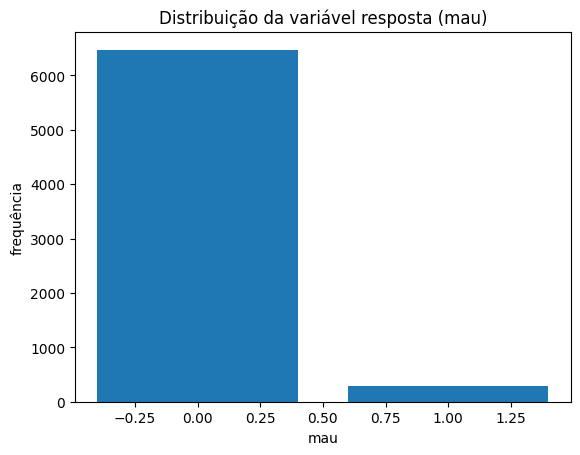

None


False    6472
True      298
Name: mau, dtype: int64

In [32]:
# verificar a distribuição da variável resposta (mau)


plt.bar(demo['mau'].value_counts().index, demo['mau'].value_counts().values)

plt.xlabel('mau')
plt.ylabel('frequência')

plt.title('Distribuição da variável resposta (mau)')

print(plt.show())


# Contar os valores dos resultados na coluna 'mau'
demo['mau'].value_counts()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [33]:
# O primeiro passo é criar um dataframe com o nome de cada variáveç e o tipos de dados de cada variável
# então abaixo passsamos um dicionário que terá uma coluna chamada "nome" e outra chamada "tipo"
# Preenchemos a coluna 'nome' com as colunas do nosso dataframe demo, então temos demo.columns
# Preenchemos a coluna 'tipos' com os tipos do nosso dataframe demo, então temos demo.dtypes

metadados = pd.DataFrame({'nome': demo.columns, 'tipo': demo.dtypes})
metadados



,nome,tipo
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object
educacao,educacao,object
estado_civil,estado_civil,object
tipo_residencia,tipo_residencia,object
idade,idade,float64
tempo_emprego,tempo_emprego,float64


In [34]:
# Segundo passo: Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.

# Lista vazia
qtd_categorias = []

# faz um for ao longo dos nomes das variáveis
for nome in metadados['nome']:
  n = demo[nome].nunique() # conta o número de categorias dessa variável
  qtd_categorias.append(n) # acumula essa informação na lista

# atribui a lista à variável
metadados['qtd_categorias'] = qtd_categorias

metadados['qtd_categorias']


sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  8
tipo_renda                  5
educacao                    5
estado_civil                5
tipo_residencia             6
idade                    5298
tempo_emprego            3005
possui_celular              1
possui_fone_comercial       2
possui_fone                 2
possui_email                2
qt_pessoas_residencia       9
mau                         2
Name: qtd_categorias, dtype: int64

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [35]:
# usei o método get_dummies para agir no dataframe demo, nas colunas que eram object para transformar em numéricas (dummies)

variaveis_apropriadas = pd.get_dummies(demo, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

variaveis_apropriadas.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0
6,0,27.482192,4.024658,1,0,1,0,2.0,False,0,...,1,1,0,0,0,1,0,0,0,0


In [36]:
# Vamos ver como as variáveis de encontram agora

variaveis_apropriadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   uint8  
 10  posse_de_veiculo_Y                      6770 non-null   uin

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [37]:
# Vamos usar o método crosstab do pandas para curzar os dados

# pd.crosstab(demo['possui_email'], demo['posse_de_veiculo'])
pd.crosstab(demo['possui_email'], demo['posse_de_veiculo'], margins=True, normalize=True)

# Essa tabela mostra quantas pessoas possuem ou não email e veículo na base de dados

posse_de_veiculo,N,Y,All
possui_email,,,
0,0.572821,0.343722,0.916544
1,0.049188,0.034269,0.083456
All,0.622009,0.377991,1.000000


In [38]:
# Vou fazer o seguinte Vou usar a função crosstab novamente com os parâmetros margins=True (para obter as somas marginais), normalize=True (para obter as proporções)

pd.crosstab(demo['possui_email'], demo['mau'], margins=True, normalize=True)

mau,False,True,All
possui_email,,,
0,0.875480,0.041064,0.916544
1,0.080502,0.002954,0.083456
All,0.955982,0.044018,1.000000


In [39]:
# Vamos juntar todos em uma tabela para ficar mais claro

pd.crosstab(demo['possui_email'], demo['posse_de_veiculo'], demo['mau'], margins=True, normalize=True, aggfunc='mean')

posse_de_veiculo,N,Y,All
possui_email,,,
0,0.286282,0.251655,0.55863
1,0.146547,0.315517,0.44137
All,0.516696,0.483304,1.00000


**Análise rápida**

A variável possui_email indica se a pessoa tem ou não um endereço de email. A variável posse_de_veiculo indica se a pessoa tem ou não um veículo. A variável mau indica se a pessoa é ou não um mau pagador, ou seja, se ela tem ou não dificuldade para pagar suas dívidas.

A tabela cruzada nos mostra que a média dos valores de mau é maior para as pessoas que não possuem email do que para as pessoas que possuem email, independentemente de possuírem ou não veículo. Isso significa que ter ou não um email faz diferença na probabilidade de ser um mau pagador.

Por outro lado, a tabela cruzada nos mostra que a média dos valores de mau é quase igual para as pessoas que possuem ou não veículo, independentemente de possuírem ou não email. Isso significa que ter ou não um veículo não faz muita diferença na probabilidade de ser um mau pagador.

Portanto,  **a variável possui_email é mais poderosa para prever a probabilidade de mau = 1 do que a variável posse_de_veiculo**

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [41]:
demo.to_csv('demo_nova.csv')
